In [3]:
from sklearn import datasets, preprocessing
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
X = diabetes['data']
y = diabetes['target']

/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


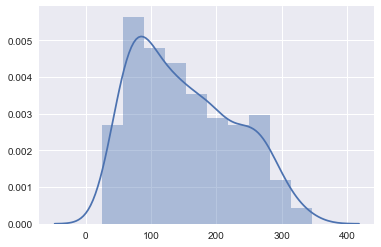

In [6]:
sns.distplot(y)

In [7]:
X.shape

(442, 10)

In [ ]:
m, n = X.shape 
for col in range(n):
    sns.distplot(X[:,col])
    plt.show()

In [ ]:
m, n = X.shape 
for col in range(n):
    sns.jointplot(X[:,col], y)
    plt.show()

In [ ]:
from sklearn import linear_model, model_selection

In [ ]:
# elastic net 

clf = linear_model.ElasticNetCV(normalize=True, n_jobs=-1, cv=10)
clf.fit(X, y)
preds = clf.predict(X)
sns.jointplot(y, preds)

In [ ]:
for pth in clf.mse_path_.T:
    plt.plot(pth)

In [ ]:
clf.coef_

In [ ]:
# lasso 

clf = linear_model.LassoCV(eps=0.001, n_alphas=10)
model_selection.cross_val_score(clf, X, y)
preds = model_selection.cross_val_predict(clf, X, y) 
sns.jointplot(preds, y, X, kind='reg')

In [ ]:
feature_selection.mutual_info_regression(X, y, discrete_features=False)

In [ ]:
from sklearn import decomposition, pipeline, feature_selection

In [ ]:
# pca + lasso  

pln = pipeline.Pipeline([
#     ('pca', decomposition.PCA(n_components=2)),
    ('mi', feature_selection.mutual_info_regression()), 
    ('lasso', linear_model.Lasso()),
])

kfold = model_selection.KFold(n_splits=10, shuffle=True)

pred = model_selection.cross_val_predict(pln, X, y, cv=kfold, n_jobs=-1)
sns.jointplot(y, pred, kind='reg')